In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_cleaned_datase.csv')

In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
## since this is a regression problem we are considering FWI as dependent feature if classification problem then classes will be taken care of

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1) # Even if the values contain spcaes then also it will work

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## Indepenedent and dependent featues
X=df.drop('FWI',axis=1)
Y=df.iloc[:,-3]

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [13]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

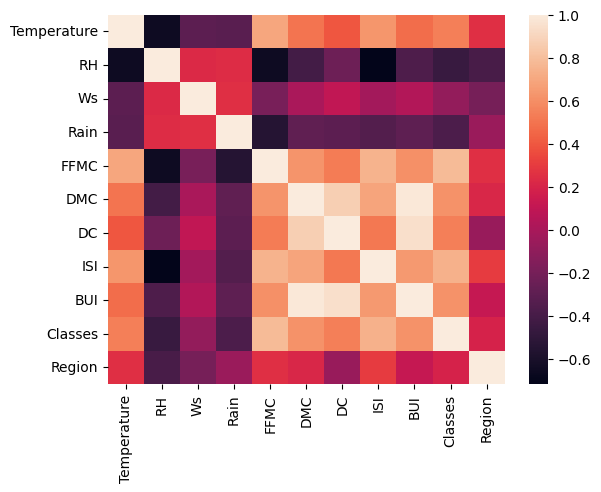

In [15]:
## Feature selection based on Correlation
sns.heatmap(X_train.corr())

<Axes: >

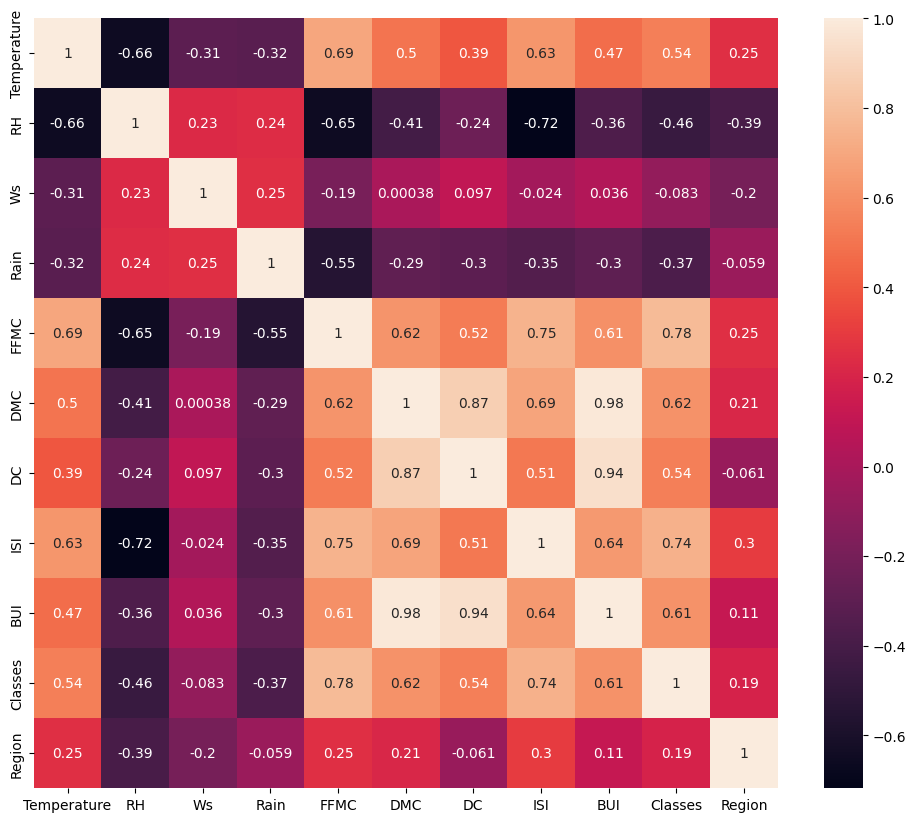

In [16]:
## Check for colinearity -> iremoving independent features that are highly correlated
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold): # abs will make value +
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
## we set the threshhold --  Domain experiance
corr_col=correlation(X_train,0.85)

In [19]:
corr_col

{'BUI', 'DC'}

In [20]:
## drop featues when correlation is more than 0.85
X_train.drop(corr_col,axis=1,inplace=True)
X_test.drop(corr_col,axis=1,inplace=True)

In [21]:
X_test.shape,X_train.shape

((61, 9), (182, 9))

## Feature Scaleing and Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [23]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

## Box plot to understand Effects of Standard Scalar

Text(0.5, 1.0, 'X_train after scalling')

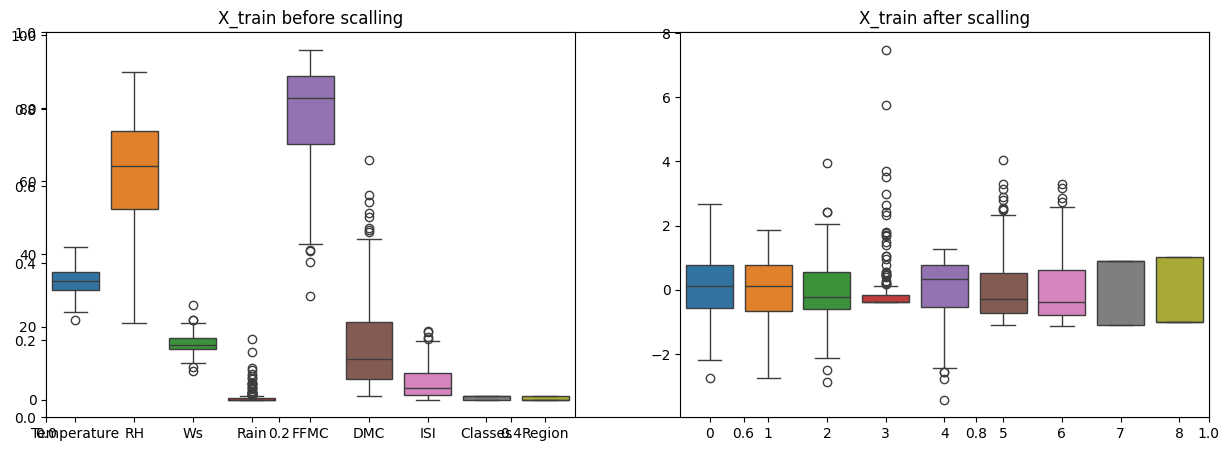

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_train after scalling')


## Linear Regression Model

Mean absolute error  0.546823646524997
R2 score  0.9847657384266951


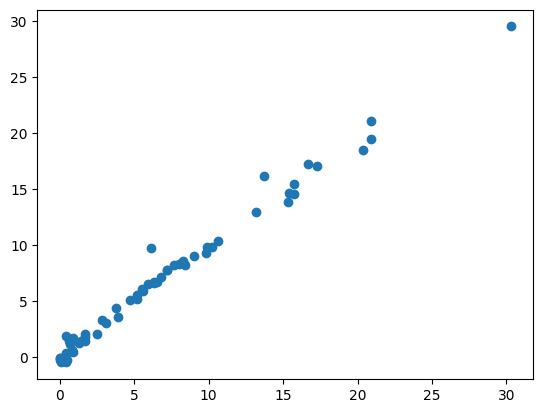

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,Y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error ",mae)
print("R2 score ",score)
plt.scatter(Y_test,y_pred)

## Lasso Regression

Mean absolute error  1.133175994914409
R2 score  0.9492020263112388


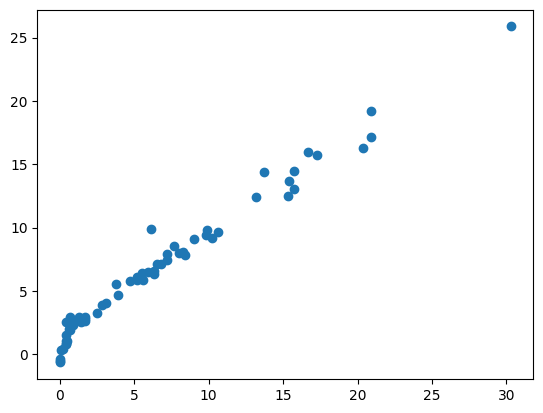

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error ",mae)
print("R2 score ",score)
plt.scatter(Y_test,y_pred)

## Ridge Regression

The mean squared error is  0.5642305340105691
The R2 score is  0.9842993364555513


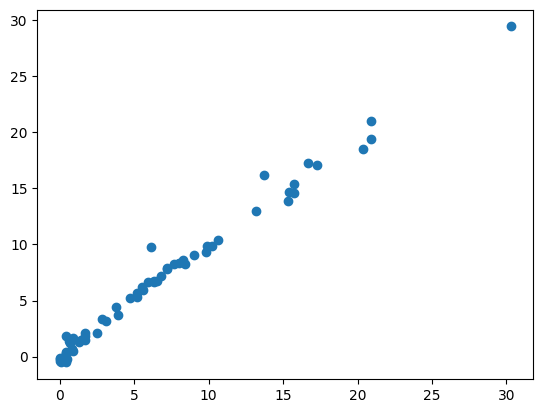

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
print("The mean squared error is ",mean_absolute_error(Y_test,y_pred))
print("The R2 score is ",r2_score(Y_test,y_pred))
plt.scatter(Y_test,y_pred)

The mean squared error is  1.8822353634896
The R2 score is  0.8753460589519703


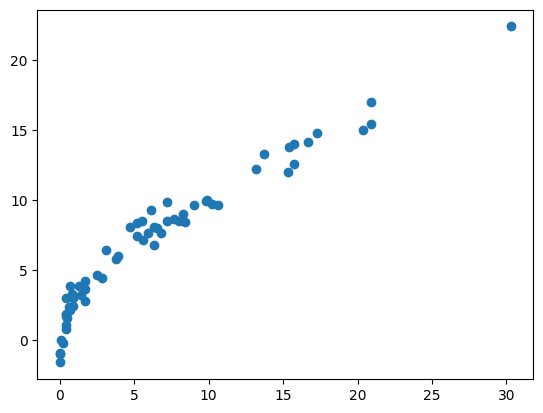

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
y_pred=elastic.predict(X_test_scaled)
print("The mean squared error is ",mean_absolute_error(Y_test,y_pred))
print("The R2 score is ",r2_score(Y_test,y_pred))
plt.scatter(Y_test,y_pred)

## Cross Validation Lasso

In [29]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
lassocv=LassoCV(cv=5) # how many number of k-folds it should happen
ridgecv=RidgeCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
ridgecv.fit(X_train_scaled,Y_train)

RidgeCV(cv=5)

Mean square error is  0.6199701158263431
R2 score is  0.9820946715928275


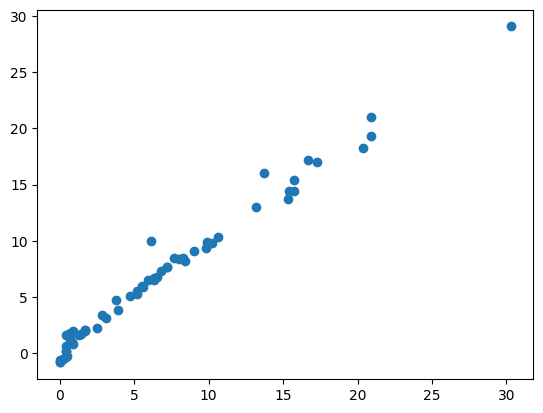

In [30]:
y_pred=lassocv.predict(X_test_scaled)
y_pred_1=lassocv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean square error is ",mae)
print("R2 score is ",score)

In [31]:
ridgecv.alpha_

np.float64(1.0)

In [32]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [33]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [34]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [35]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [36]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [37]:
## Pickle the ml model

In [38]:
import pickle
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))